# **TCBC** Proof of Concept
with 20cm Lens

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def dat2array(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for i, line in enumerate(file):
            line = line.replace(',', '.').replace('\t', ';').replace('\n', '')
            if i >= 39:  # Skip header lines
                data.append(line.split(';'))

    freqs = [float(row[0]) for row in data]
    intensities = [float(row[1]) for row in data]
    return freqs, intensities
    

## TCBC

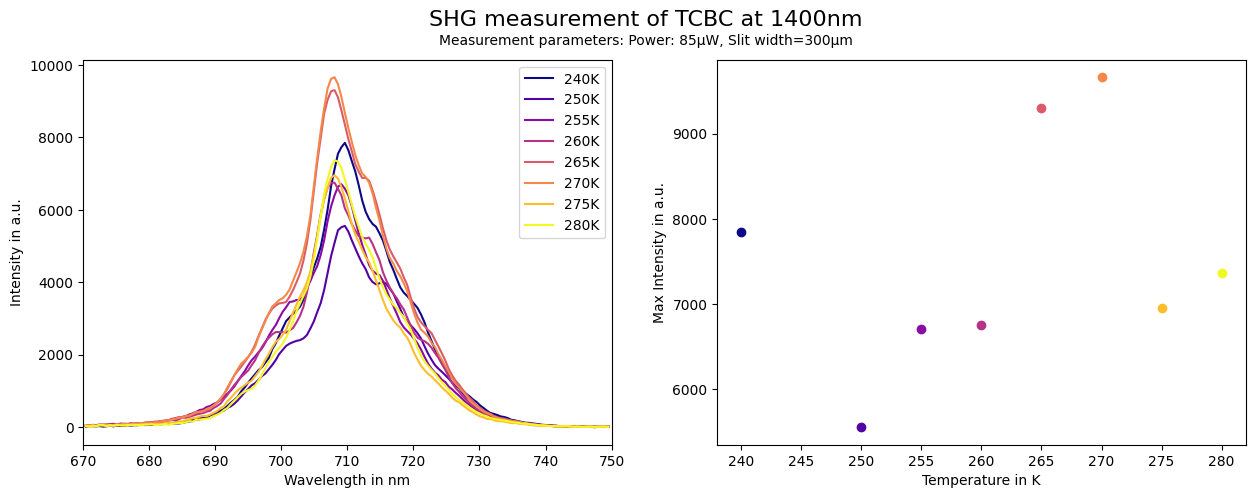

The maximum intensity across all temperatures is: 9662.0


In [2]:
# Define the range for the x-axis
middle_value = 710
difference = 40
x_range = (middle_value - difference, middle_value + difference)

temps = [240,250,255,260,265,270,275,280]

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
colors = cm.plasma(np.linspace(0, 1, len(temps)))
peak_list = []

for idx, t in enumerate(temps):
    file_path = f'2025-05-09_TCBC_1400nm_0.1mW_85uW_Slit300um/{t}K.asc'
    freqs, intensities = dat2array(file_path)
    intensities = [val / 1 for val in intensities] # Normalize intensities if needed
    
    # Filter data within the x-axis range
    filtered_data = [(f, i) for f, i in zip(freqs, intensities) if x_range[0] <= f <= x_range[1]]
    filtered_freqs, filtered_intensities = zip(*filtered_data) if filtered_data else ([], [])
    
    ax0.plot(filtered_freqs, filtered_intensities, color=colors[idx], label=f'{t}K')
    if filtered_intensities:
        peak_list.append(max(filtered_intensities))
        ax1.scatter(t, max(filtered_intensities), color=colors[idx])

ax0.set_xlim(x_range)
ax0.set_xlabel('Wavelength in nm')
ax0.set_ylabel('Intensity in a.u.')
ax0.legend(loc='upper right')

ax1.set_xlabel('Temperature in K')
ax1.set_ylabel('Max Intensity in a.u.')

fig.suptitle('SHG measurement of TCBC at 1400nm', fontsize=16)
fig.text(0.5, 0.91, "Measurement parameters: Power: 85µW, Slit width=300µm", ha="center")
plt.show()
fig.savefig('./TCBC_SHG_ProofOfConcept.png', dpi=600, bbox_inches='tight')
fig.savefig('./TCBC_SHG_ProofOfConcept.pdf', dpi=600, bbox_inches='tight')
# Print the maximum value from the peak_list
print("The maximum intensity across all temperatures is:", max(peak_list))